In [17]:
import os

path, dirs, files =next(os.walk('train'))

print('There is')
print(len(files))
print('files')

There is
25000
files


In [18]:
file_names= os.listdir('train')[:2000]
print(file_names[0])

dog.8011.jpg


In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

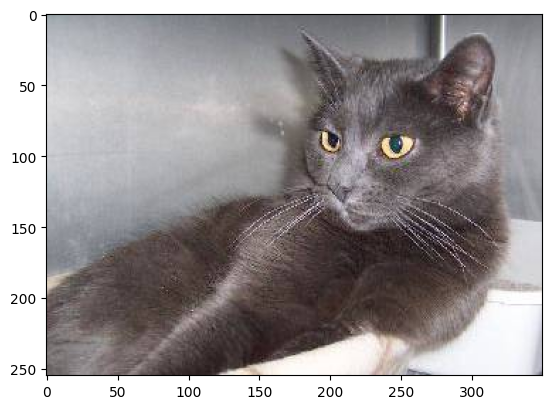

In [20]:
cat= mpimg.imread('train/cat.10445.jpg')
plt.imshow(cat)
plt.show()

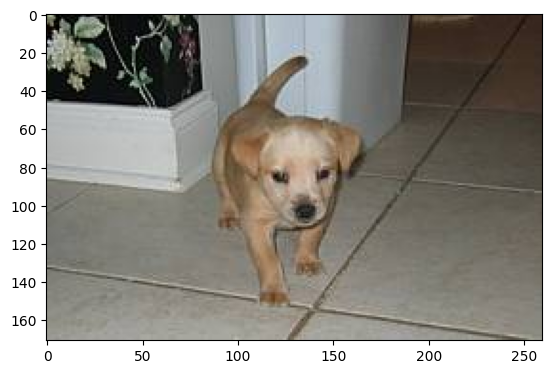

In [21]:
dog= mpimg.imread('train/dog.10376.jpg')
plt.imshow(dog)
plt.show()

In [22]:
dog_files=[]
cat_files=[]

labels = []

for file_name in file_names:
    if file_name.startswith('cat'):
        cat_files.append(file_name)

        labels.append(0)
    elif file_name.startswith('dog'):
        dog_files.append(file_name)

        labels.append(1)
    
print(len(dog_files))
print(len(cat_files))



1014
986


In [23]:
import PIL
for file_name in file_names:
    img= PIL.Image.open('train/'+ file_name)
    img= img.resize((224, 224))
    img= img.convert('RGB')

    img.save('resized/'+ file_name)

In [24]:
dog_resized=[]
cat_resized=[]

for file_name in file_names:
    if file_name.startswith('cat'):
        cat_resized.append(file_name)
    elif file_name.startswith('dog'):
        dog_resized.append(file_name)
    
print(len(dog_resized))
print(len(cat_resized))



1014
986


In [25]:
import cv2
import glob
import numpy as np

dog_cat_images = []

for file_name in file_names:
    dog_cat_images.append(cv2.imread('resized/' + file_name))

dog_cat_images = np.asarray(dog_cat_images)

In [26]:
from sklearn.model_selection import train_test_split

labels = np.asarray(labels)

X_train, X_test, Y_train, Y_test = train_test_split(dog_cat_images, labels, test_size=0.2, random_state=2)

X_train_scaled = X_train/225

X_test_scaled = X_test/255

In [27]:
import tensorflow as tf
import tensorflow_hub as hub 

mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)


In [28]:
model = tf.keras.Sequential([
    pretrained_model, 
    tf.keras.layers.Dense(2)
])

model.summary()

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

model.fit(X_train_scaled, Y_train, epochs=5)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/5
50/50 [==============================] - 9s 137ms/step - loss: 0.2006 - acc: 0.9231
Epoch 2/5
50/50 [==============================] - 7s 138ms/step - loss: 0.0675 - acc: 0.9781
Epoch 3/5
50/50 [==============================] - 8s 152ms/step - loss: 0.0525 - acc: 0.9850
Epoch 4/5
50/50 [==============================] - 7s 140ms/step - loss: 0.0429 - acc: 0.9869
Epoch 5/5
50/50 [==============================] - 7s 138ms/

In [29]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =',score)
print('Test Accuracy =', acc)

13/13 [==============================] - 2s 145ms/step - loss: 0.0583 - acc: 0.9800
Test Loss = 0.05829516798257828
Test Accuracy = 0.9800000190734863


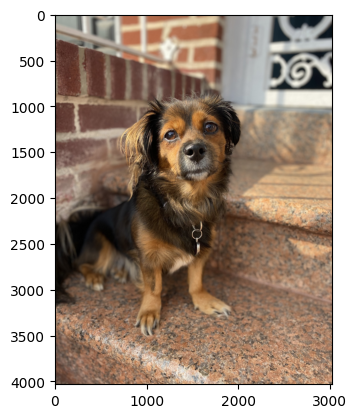

In [48]:
test_image = int(input("Give me a number between 1 and 12500"))

user_image = mpimg.imread('test1 2/{}.jpg'.format(test_image))
plt.imshow(user_image)
plt.show()

In [49]:
input_image= cv2.imread(f'test1 2/{test_image}.jpg')
input_image_resize= cv2.resize(input_image, (224,224))
input_image_scaled= input_image_resize/255
image_reshaped= np.reshape(input_image_scaled, [1,224,224,3])
input_prediction= model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 30ms/step
[[-3.828065   3.0990355]]


In [50]:
cat_or_dog= np.argmax(input_prediction)
print(cat_or_dog)

if cat_or_dog==0:
    print('meow')
elif cat_or_dog==1:
    print('ruff') 

1
ruff
